In [ ]:
### This is the Google Colab notebook the neural network was developed in

# Install nltk
!pip install --user -U nltk

     |████████████████████████████████| 1.5 MB 4.4 MB/s 
     |████████████████████████████████| 749 kB 39.6 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data =pd.read_csv('/content/gdrive/MyDrive/UpdatedResumeDataSet.csv')

data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Print unique categories of resumes
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [ ]:
# Drop rows where category is "Testing" and store new size of dataset
data = data[data.Category != 'Testing']
data_size = len(data)

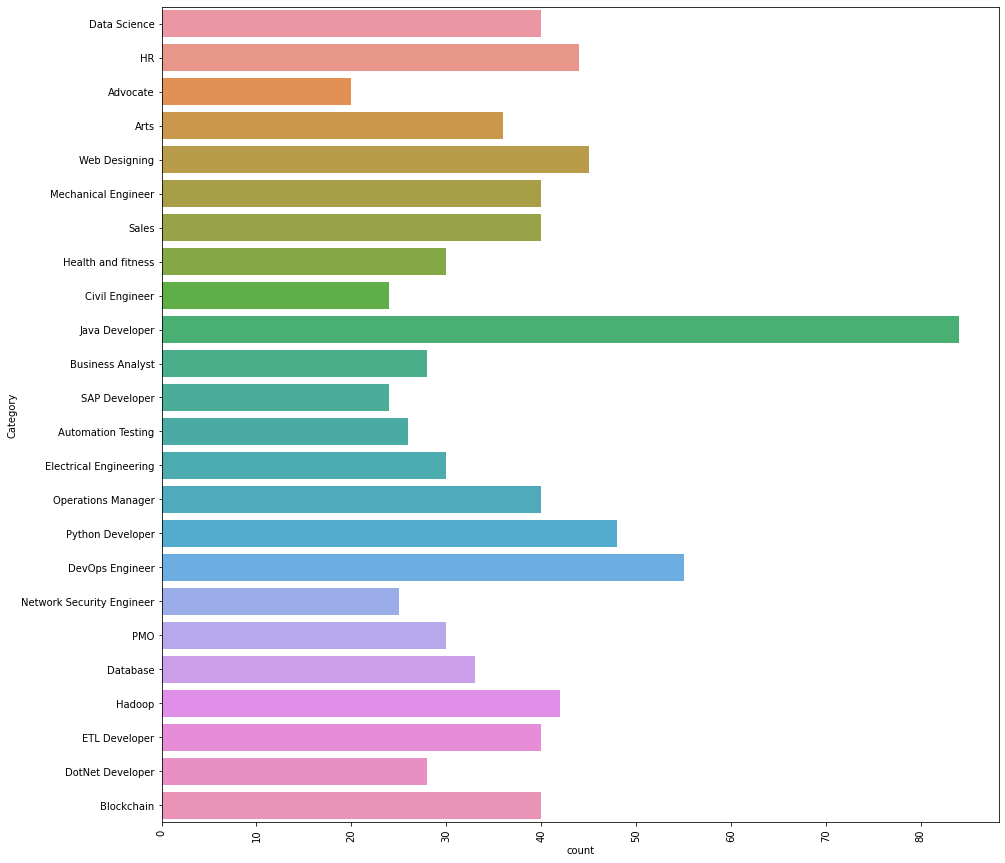

In [ ]:
# Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [ ]:
# Get set of stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [ ]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
    return ' '.join(filtered_text)

In [ ]:
# Print a sample original resume
print('--- Original resume ---')
print(data['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [ ]:
# Print the same resume after text cleaning
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))

print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating r

In [ ]:
# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Category'].values
labels = original_labels[:]

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

skills agile methodology scrum kanban extreme programming xp test driven development tdd feature driven development fdd domain industrial automation retail banking insurance health care automation framework modular data driven bpt hybrid test automation tool hp uft taf load runner selenium rational robot dcmtk sikuli languages vb script c python shell script bug tracking tool bugzilla jira hp quality control ap test clear quest version management clear case win cvs svn database oracle sql server mysql network protocols tcp ip http https vpn ftp ldap healthcare dicom pacs hl7 image archiving image reconstruction rockwell automation logix designer factory talk rslinx classic control flash compare tool modules profiles education details bachelor science computer science mumbai maharashtra mumbai university qa automation lead qa automation lead skill details c exprience 63 months python exprience 109 months uft exprience 85 months selenium exprience 85 months sql exprience 69 monthscompany

In [ ]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

713
179


In [ ]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, '1': 9, 'management': 10, 'team': 11, 'year': 12, '6': 13, 'system': 14, 'maharashtra': 15, 'database': 16, 'development': 17, 'business': 18, 'less': 19, 'sql': 20, 'ltd': 21, 'using': 22, 'developer': 23, 'client': 24, 'java': 25, 'skill': 26, 'testing': 27, 'application': 28, 'pune': 29, 'engineering': 30, 'january': 31, 'services': 32, 'work': 33, 'skills': 34, 'c': 35, 'test': 36, 'software': 37, 'sales': 38, 'responsibilities': 39, 'pvt': 40, 'operations': 41, 'requirements': 42, 'reports': 43, 'education': 44, 'server': 45, 'technical': 46, 'process': 47, 'india': 48, 'customer': 49, 'various': 50, 'design': 51, 'technologies': 52, 'university': 53, 'working': 54, 'python': 55, 'monthscompany': 56, '2': 57, 'environment': 58, 'web': 59, 'like': 60, 'automation': 61, 'college': 62, 'support': 63, 'mysql': 64, 'worked': 65, 'role': 66, 'technology': 67, 'activities': 68

In [ ]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'datascience': 7, 'mechanicalengineer': 8, 'blockchain': 9, 'etldeveloper': 10, 'sales': 11, 'operationsmanager': 12, 'arts': 13, 'database': 14, 'pmo': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'businessanalyst': 18, 'dotnetdeveloper': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
[20]
[5]


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  34  452  567 1043 4157 4158  214  492   36  628   17 1996 1004  628
   17 4159  850  424   61 1205  328  305  219  860   61  228 4160    8
  628 2714 1997   36   61  226 1608 1534 1998  510 4161  683 1395 1135
 2715 3489  225 1999  268   35   55  135  268  730  359  226 4162  795
 1608   95  124 1535   36  952 2716  541   10  952  394 1336 1955 1410
   16   93   20   45   64   91 1676 4163 1583 2988 4164 1136  810 3440
  764 1337 1609 2000  953 2717  953 2001 2450   61 2002  438 1137 2003
 2004 2005  124 2613 1468  226  363 1275   44    7  245  101   86  101
   78   15   78   53  287   61  218  287   61  218   26    7   35    2
 4039    5   55    2 4165    5 1534    2 1338    5  683    2 1338    5
   20    2 4166   56    7    3  409  424   61    6   39   36 2450   61
 2006   90 2002  438 1137 2003 2004 2005  124 2613 1468  226  363 1275
  444  639  940  287  694   51  197   36  818   36  187  177   36  187
   36  222  523  157   94  177  192  582 4167 4168   94  287   11   33
 1043 

In [ ]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,dropout=0.2)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
Total params: 459,929
Trainable params: 459,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Alternative model
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Flatten(),
  #tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.GlobalMaxPooling1D(),


  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax'),
  #tf.keras.layers.Dense(1, activation='sigmoid'),
  #tf.keras.layers.Dense(1)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 64)             384000    
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 25)                3225      
                                                                 
Total params: 395,545
Trainable params: 395,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
print(train_feature_padded[0])
print(train_label_sequences[0])
print(test_feature_padded[0])
print(test_label_sequences[0])

[  34  452  567 1043 4157 4158  214  492   36  628   17 1996 1004  628
   17 4159  850  424   61 1205  328  305  219  860   61  228 4160    8
  628 2714 1997   36   61  226 1608 1534 1998  510 4161  683 1395 1135
 2715 3489  225 1999  268   35   55  135  268  730  359  226 4162  795
 1608   95  124 1535   36  952 2716  541   10  952  394 1336 1955 1410
   16   93   20   45   64   91 1676 4163 1583 2988 4164 1136  810 3440
  764 1337 1609 2000  953 2717  953 2001 2450   61 2002  438 1137 2003
 2004 2005  124 2613 1468  226  363 1275   44    7  245  101   86  101
   78   15   78   53  287   61  218  287   61  218   26    7   35    2
 4039    5   55    2 4165    5 1534    2 1338    5  683    2 1338    5
   20    2 4166   56    7    3  409  424   61    6   39   36 2450   61
 2006   90 2002  438 1137 2003 2004 2005  124 2613 1468  226  363 1275
  444  639  940  287  694   51  197   36  818   36  187  177   36  187
   36  222  523  157   94  177  192  582 4167 4168   94  287   11   33
 1043 

In [ ]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
23/23 - 3s - loss: 3.2073 - accuracy: 0.0715 - val_loss: 3.1901 - val_accuracy: 0.0950 - 3s/epoch - 116ms/step
Epoch 2/12
23/23 - 0s - loss: 3.1610 - accuracy: 0.0940 - val_loss: 3.1452 - val_accuracy: 0.0950 - 494ms/epoch - 21ms/step
Epoch 3/12
23/23 - 0s - loss: 3.0953 - accuracy: 0.0940 - val_loss: 3.0778 - val_accuracy: 0.0950 - 491ms/epoch - 21ms/step
Epoch 4/12
23/23 - 0s - loss: 3.0034 - accuracy: 0.0940 - val_loss: 2.9843 - val_accuracy: 0.0950 - 392ms/epoch - 17ms/step
Epoch 5/12
23/23 - 0s - loss: 2.8736 - accuracy: 0.1206 - val_loss: 2.8349 - val_accuracy: 0.1229 - 379ms/epoch - 16ms/step
Epoch 6/12
23/23 - 0s - loss: 2.6795 - accuracy: 0.1950 - val_loss: 2.6052 - val_accuracy: 0.2905 - 480ms/epoch - 21ms/step
Epoch 7/12
23/23 - 0s - loss: 2.3937 - accuracy: 0.4278 - val_loss: 2.2868 - val_accuracy: 0.5531 - 476ms/epoch - 21ms/step
Epoch 8/12
23/23 - 0s - loss: 2.0087 - accuracy: 0.6452 - val_loss: 1.8800 - val_accuracy: 0.7318 - 389ms/epoch - 17ms/step
Epoch 9/12

In [ ]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

areas interest deep learning control system design programming python electric machinery web development analytics technical activities q hindustan aeronautics limited bangalore 4 weeks guidance mr satish senior engineer hangar mirage 2000 fighter aircraft technical skills programming matlab python java labview python webframework django flask ltspice intermediate languages mipower intermediate github gitbash jupyter notebook xampp mysql basics python software packages interpreters anaconda python2 python3 pycharm java ide eclipse operating systems windows ubuntu debian kali linux education details january 2019 b tech electrical electronics engineering manipal institute technology january 2015 deeksha center january 2013 little flower public school august 2000 manipal academy higher data science data science electrical enthusiast skill details data analysis exprience less 1 year months excel exprience less 1 year months machine learning exprience less 1 year months mathematics exprienc

In [ ]:
# Create padded sequence for example
resume_example = 'skills bitcoin ethereum solidity hyperledger beginner go beginner r3 corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision data analytics cloud computing reactjs angulareducation details january 2014 january 2018 bachelor engineering computer science engineering thakur college engineering technology september 2016 march 2017 dynamic blood bank system mumbai maharashtra iit january 2014 cbse senior secondary january 2011 cbse banking vidyashram public school blockchain developer blockchain developer zhypility technologies skill details networking exprience 27 months data analytics exprience 11 months computer vision exprience 6 months java exprience 6 months machine learning exprience 6 monthscompany details company zhypility technologies description une 2018 company area business owner amway enterprise limited description business strategizing promotion analytics networking terms company virtual description developing prototype smart india hackthon deployment level 3 networking switch intern bharti airtel private limited mumbai company 1 international research scholar university rome tor vergata rome description nov 2017 nov 2017 done research reality based brain computer interface proposed paper international journal advanced research ijar 20656 epted paper reviewer smart kisan revolutionizing country ijsrd epted publication company description reliance jio mumbai dec 2017 jan 2017 company maharastra state government hackthon description company virtual description handling group interns marketing sales team nearby promote social media platform nearby products company promotion stock marketing drums foods international description company 8 data science web analytics positron internet virtual description company description making people aware women equality rights raise voice violence various modes events sources media help society company iit bombay iit kgp startup description company iit bombay iit kgp startup description'
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[  34 1350  482 1351 2028 2090  781 2090 2091 4663 2090 4664 2890   35
   214   25  165  158 4665 2189   86  515   86  513   45  526   86 1226
     8  271  260 1626 4666 4667    7   31  220   31  258  245   30   86
   101   30 3086   62   30   67 1223  137  963  132 1159 4668  180   14
    78   15 1119   31  220 2056  227  455   31  433 2056  328 4669  688
   139  259   23  259   23 2891   52   26    7  513    2  966    5    8
   271    2  706    5   86 1226    2   13    5   25    2   13    5  165
   158    2   13   56    7    3 2891   52    6 4670  258    3  502   18
  3307 4671  416  206    6   18 2811 1574  271  513 1061    3 1292    6
   113 1427  531   48 2892  255  155   80  513 1863 3283 4672 2967  374
   206   78    3    9  203  400 4673   53 2893 4674 4675 2893    6  788
   132  788  132  430  400 3872   71 2189   86  515 2064  814  203 4676
  1142  400 4677 4678 1923  814 4679  531 2367 4680 2368 4681 1923 2190
     3    6 1662 2894   78 1398  132  687  132    3 4682  215  7

In [ ]:
# Make a prediction
prediction = model.predict(example_padded)

In [ ]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  # should be 25
print(np.sum(prediction[0]))  # should be 1

[6.4004e-06 2.2038e-03 9.9130e-04 7.7813e-04 5.2619e-03 4.9861e-05
 1.0971e-02 2.2322e-03 2.1937e-02 8.0801e-01 2.1221e-03 7.1103e-03
 2.6010e-03 7.0260e-04 4.0792e-02 7.4012e-03 6.1213e-03 8.8432e-03
 1.5772e-03 5.4878e-02 3.0475e-03 4.7919e-03 1.3837e-03 3.1278e-03
 3.0566e-03]
25
1.0


In [ ]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) # should be 11 which corresponds to blockchain

0.80801326
9


In [ ]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[9, 19, 14, 8, 6]


In [ ]:
# Save model
model.save('LSTM_model')

INFO:tensorflow:Assets written to: LSTM_model/assets


In [ ]:
# Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)


{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'datascience': 7, 'mechanicalengineer': 8, 'blockchain': 9, 'etldeveloper': 10, 'sales': 11, 'operationsmanager': 12, 'arts': 13, 'database': 14, 'pmo': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'businessanalyst': 18, 'dotnetdeveloper': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
{1: 'javadeveloper', 2: 'devopsengineer', 3: 'pythondeveloper', 4: 'webdesigning', 5: 'hr', 6: 'hadoop', 7: 'datascience', 8: 'mechanicalengineer', 9: 'blockchain', 10: 'etldeveloper', 11: 'sales', 12: 'operationsmanager', 13: 'arts', 14: 'database', 15: 'pmo', 16: 'electricalengineering', 17: 'healthandfitness', 18: 'businessanalyst', 19: 'dotnetdeveloper', 20: 'automationtesting', 21: 'networksecurityengineer', 22: 'civilengineer', 23: 'sapdeveloper', 24: 'advocate'}


In [ ]:
print(encoding_to_label[np.argmax(prediction[0])])

blockchain


In [ ]:
!pip install PyMuPDF

     |████████████████████████████████| 8.8 MB 5.0 MB/s 


In [ ]:
# with open("",'r',encoding='utf-8',errors='ignore') as f1:
#   sentence2=f1.read()

# with open('/content/Faisal Shahzad - CV for Lab Instructor.txt','r',encoding='utf-8',errors='ignore') as f:
#         data=f.readlines()
#         data=_to_string(data)
#         data=_base_clean(data)
#         data=_to_string(data)
#         print(data)


import fitz
text=""
path='''/content/Zain Shakir Resume.pdf'''
file=path.split('/')
print(file)
for page in fitz.open('/content/'+file[2]):
  text = text + str(page.getText())
  text = " ".join(text.split('\n'))

['', 'content', 'Zain Shakir Resume.pdf']


FileNotFoundError: ignored

In [ ]:
# def clean_text(resume_text):
#     resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
#     resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
#     resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
#     resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
#     resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
#     resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
#     resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
#     resume_text = resume_text.lower()  # convert to lowercase
#     resume_text_tokens = word_tokenize(resume_text)  # tokenize
#     filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
#     return ' '.join(filtered_text)


# resume_clean=clean_text(sentence2)
print(text)

ZAIN SHAKIR  shakir.zain@yahoo.com | 03102149618 | https://github.com/ZainShakir    Talented, ambitious and hardworking Student, with broad skills and experience in Programming. I am looking for an  internship to be associated with an organization that will allow me to put my skills and credentials in the area to add  value to the organization while also providing me with prospects for advancement.    Education                                         FAST NUCES                                           2019-Expected 2023  Bachelor of Computer Science  • CGPA: 3.46/4.0  • Courses: OOP, Data structures, Database systems, Operating systems, Software design and analysis,SE    Govt. Delhi College                                          2017-2019  Pre-Engineering  • Grade: A    Skills                                             Languages: Python,C/C++/C#, Dart, Javascript, , PHP  Markup Language/FrameWorks:HTML,CSS,FLASK  Technologies: Flutter,Jira,Figma,.NET  DataBase:Firebase, MongoDB,MyS

In [ ]:
# resume_clean=clean_text(sentence2)
resume_clean=text
print(resume_clean)

ZAIN SHAKIR  shakir.zain@yahoo.com | 03102149618 | https://github.com/ZainShakir    Talented, ambitious and hardworking Student, with broad skills and experience in Programming. I am looking for an  internship to be associated with an organization that will allow me to put my skills and credentials in the area to add  value to the organization while also providing me with prospects for advancement.    Education                                         FAST NUCES                                           2019-Expected 2023  Bachelor of Computer Science  • CGPA: 3.46/4.0  • Courses: OOP, Data structures, Database systems, Operating systems, Software design and analysis,SE    Govt. Delhi College                                          2017-2019  Pre-Engineering  • Grade: A    Skills                                             Languages: Python,C/C++/C#, Dart, Javascript, , PHP  Markup Language/FrameWorks:HTML,CSS,FLASK  Technologies: Flutter,Jira,Figma,.NET  DataBase:Firebase, MongoDB,MyS

In [ ]:
max_length = 500
trunc_type = 'post'
padding_type = 'post'


predict_sequences = feature_tokenizer.texts_to_sequences([resume_clean])
predict_padded = pad_sequences(predict_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predict_padded = np.array(predict_padded)

In [ ]:
predict = model.predict(predict_padded)

In [ ]:
encodings = np.argpartition(predict[0], -5)[-5:]
encodings = encodings[np.argsort(prediction[0][encodings])]
encodings = reversed(encodings)

In [ ]:
print(predict)

encodings

label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

[[1.8043e-06 1.1155e-03 1.1145e-01 4.2960e-03 2.1860e-02 2.1085e-01
  3.0768e-02 4.7062e-02 1.4627e-02 2.2620e-02 2.7077e-02 5.5894e-03
  3.0601e-01 5.0050e-02 1.3337e-02 6.1541e-03 2.4309e-02 9.3136e-03
  2.6340e-02 2.2801e-02 3.1877e-03 5.9044e-03 1.2794e-02 7.0296e-03
  1.5457e-02]]
{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'sales': 7, 'mechanicalengineer': 8, 'operationsmanager': 9, 'blockchain': 10, 'etldeveloper': 11, 'datascience': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'pmo': 16, 'healthandfitness': 17, 'businessanalyst': 18, 'dotnetdeveloper': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'sapdeveloper': 22, 'civilengineer': 23, 'advocate': 24}


In [ ]:
print(encoding_to_label[np.argmax(predict)])

0.3060102
datascience


This Part is for running the model in our Web Flask

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install PyMuPDF

     |████████████████████████████████| 8.8 MB 5.2 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
import re
import json
import pickle
import os
import sys,fitz

In [ ]:


with open('/content/gdrive/MyDrive/LSTM MODEL/feature_tokenizer.pickle', 'rb') as handle:
    feature_tokenizer = pickle.load(handle)         
         
with open('/content/gdrive/MyDrive/LSTM MODEL/dictionary.pickle', 'rb') as handle:
    encoding_to_label = pickle.load(handle)

with open("/content/gdrive/MyDrive/LSTM MODEL/labels.json", "r") as read_file:
            original_labels = json.load(read_file)

In [ ]:
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]  # remove stopwords
    return ' '.join(filtered_text)

In [ ]:
stopwords_set = set(stopwords.words('english')+['``',"''"])
with open("/content/Zohaib Khan - CV for Research Assistant - Lab Instructor.txt",'r',encoding='utf-8',errors='ignore') as f1:
  sentence2=f1.read()

text=clean_text(sentence2)

In [ ]:
max_length = 500
trunc_type = 'post'
padding_type = 'post'

In [ ]:
predict_sequences = feature_tokenizer.texts_to_sequences([text])
predict_padded = pad_sequences(predict_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predict_padded = np.array(predict_padded)

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/LSTM MODEL/LSTM_model')
prediction = model.predict(predict_padded)

In [ ]:
encodings = np.argpartition(prediction[0], -8)[-8:]
encodings = encodings[np.argsort(prediction[0][encodings])]
encodings = reversed(encodings)

In [ ]:
data = {}

In [ ]:
for encoding in encodings:
    label = encoding_to_label[encoding]
    probability = prediction[0][encoding] * 100
    probability = round(probability, 2)
    data[original_labels[label]]=probability

In [ ]:
if '.NET Developer' in data.keys():
    del(data['.NET Developer'])
print(data)

{'Data Scientist': 24.13, 'Automation Tester': 20.36, 'Advocate': 11.46, 'Health and Fitness': 8.27, 'SAP Developer': 7.7, 'Mechanical Engineer': 7.18, 'Business Analyst': 5.35, 'Blockchain Developer': 3.0}


In [ ]:
titles=[[],[]]
for key,values in data.items():
  titles[0].append(key)
  titles[1].append(values)
 
new_data={}
new_data[titles[0][0]]=titles[1][0]
new_data[titles[0][1]]=titles[1][1]

print(new_data)

  

{'Data Scientist': 24.13, 'Automation Tester': 20.36}
